<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.399589,65.612443,-5.443987,130.568045,135.924508,-5.356462
1,0.0,1.0,62.775828,26.149163,-2.775330,96.149660,98.856628,-2.706968
2,0.0,2.0,87.420954,77.906525,-1.180273,174.147206,175.643853,-1.496647
3,0.0,3.0,26.322587,40.259408,-1.090736,75.491259,75.981137,-0.489877
4,0.0,4.0,28.843359,30.435796,0.454599,69.733754,68.711550,1.022205
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.523265,35.933254,2.601255,114.057773,111.564160,2.493614
29996,999.0,26.0,22.050780,86.139799,-0.615558,117.575021,116.996667,0.578354
29997,999.0,27.0,42.395755,82.951096,-0.790012,134.556838,134.352684,0.204154
29998,999.0,28.0,84.111840,87.012987,0.071383,181.196210,180.326541,0.869669


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.399589,65.612443,-5.443987,130.568045,135.924508,-5.356462
1,0.0,1.0,62.775828,26.149163,-2.775330,96.149660,98.856628,-2.706968
2,0.0,2.0,87.420954,77.906525,-1.180273,174.147206,175.643853,-1.496647
3,0.0,3.0,26.322587,40.259408,-1.090736,75.491259,75.981137,-0.489877
4,0.0,4.0,28.843359,30.435796,0.454599,69.733754,68.711550,1.022205
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.523265,35.933254,2.601255,114.057773,111.564160,2.493614
29996,999.0,26.0,22.050780,86.139799,-0.615558,117.575021,116.996667,0.578354
29997,999.0,27.0,42.395755,82.951096,-0.790012,134.556838,134.352684,0.204154
29998,999.0,28.0,84.111840,87.012987,0.071383,181.196210,180.326541,0.869669


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    60.399589  65.612443 -5.443987  130.568045  135.924508 -5.356462
      1.0    62.775828  26.149163 -2.775330   96.149660   98.856628 -2.706968
      2.0    87.420954  77.906525 -1.180273  174.147206  175.643853 -1.496647
      3.0    26.322587  40.259408 -1.090736   75.491259   75.981137 -0.489877
      4.0    28.843359  30.435796  0.454599   69.733754   68.711550  1.022205
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.523265  35.933254  2.601255  114.057773  111.564160  2.493614
      26.0   22.050780  86.139799 -0.615558  117.575021  116.996667  0.578354
      27.0   42.395755  82.951096 -0.790012  134.556838  134.352684  0.204154
      28.0   84.111840  87.012987  0.071383  181.196210  180.326541  0.869669
      29.0   28.932137  41.169631  0.772423   80.874191   79.860212  1.013979

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    60.399589  65.612443 -5.443987  130.568045  135.924508 -5.356462
      1.0    62.775828  26.149163 -2.775330   96.149660   98.856628 -2.706968
      2.0    87.420954  77.906525 -1.180273  174.147206  175.643853 -1.496647
      3.0    26.322587  40.259408 -1.090736   75.491259   75.981137 -0.489877
      4.0    28.843359  30.435796  0.454599   69.733754   68.711550  1.022205
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.523265  35.933254  2.601255  114.057773  111.564160  2.493614
      26.0   22.050780  86.139799 -0.615558  117.575021  116.996667  0.578354
      27.0   42.395755  82.951096 -0.790012  134.556838  134.352684  0.204154
      28.0   84.111840  87.012987  0.071383  181.196210  180.326541  0.869669
      29.0   28.932137  41.169631  0.772423   80.874191   79.860212  1.013979

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.399589,65.612443,-5.443987,130.568045,135.924508,-5.356462
1,0.0,1.0,62.775828,26.149163,-2.775330,96.149660,98.856628,-2.706968
2,0.0,2.0,87.420954,77.906525,-1.180273,174.147206,175.643853,-1.496647
3,0.0,3.0,26.322587,40.259408,-1.090736,75.491259,75.981137,-0.489877
4,0.0,4.0,28.843359,30.435796,0.454599,69.733754,68.711550,1.022205
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.523265,35.933254,2.601255,114.057773,111.564160,2.493614
29996,999.0,26.0,22.050780,86.139799,-0.615558,117.575021,116.996667,0.578354
29997,999.0,27.0,42.395755,82.951096,-0.790012,134.556838,134.352684,0.204154
29998,999.0,28.0,84.111840,87.012987,0.071383,181.196210,180.326541,0.869669


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    60.399589  65.612443 -5.443987  130.568045  135.924508 -5.356462
      1.0    62.775828  26.149163 -2.775330   96.149660   98.856628 -2.706968
      2.0    87.420954  77.906525 -1.180273  174.147206  175.643853 -1.496647
      3.0    26.322587  40.259408 -1.090736   75.491259   75.981137 -0.489877
      4.0    28.843359  30.435796  0.454599   69.733754   68.711550  1.022205
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.523265  35.933254  2.601255  114.057773  111.564160  2.493614
      26.0   22.050780  86.139799 -0.615558  117.575021  116.996667  0.578354
      27.0   42.395755  82.951096 -0.790012  134.556838  134.352684  0.204154
      28.0   84.111840  87.012987  0.071383  181.196210  180.326541  0.869669
      29.0   28.932137  41.169631  0.772423   80.874191   79.860212  1.013979

[30000 rows x 6 columns]

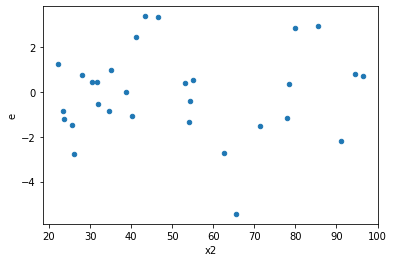

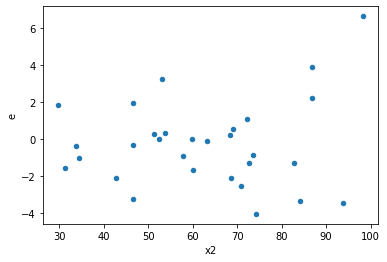

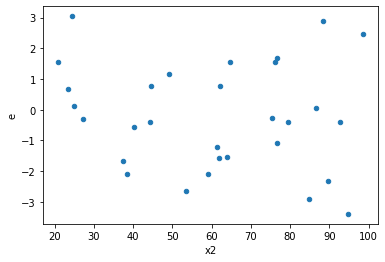

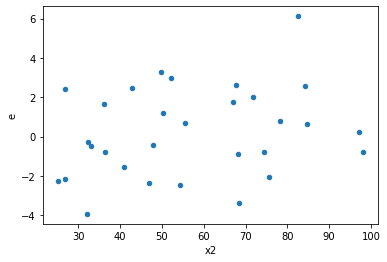

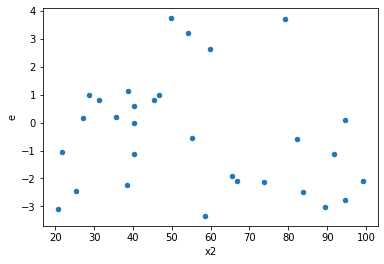

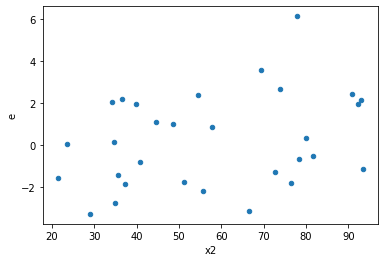

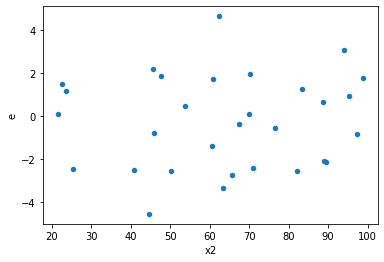

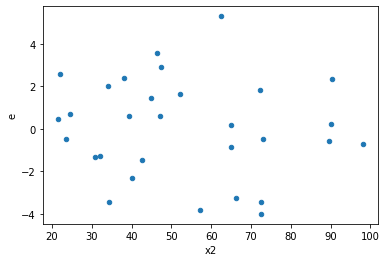

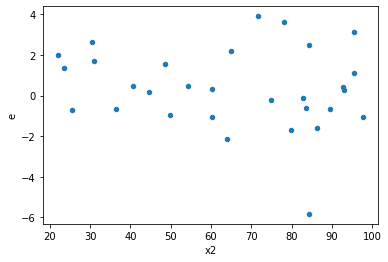

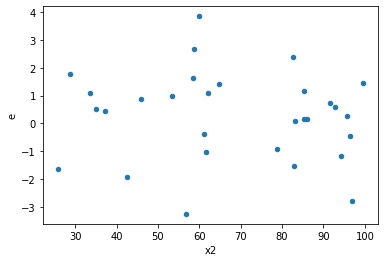

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,13.070063517157928,49.147195868601464,1.3070063517157928,4.914719586860146,3.7602874541568,0.04812405092837002,0.975937974535815,0.02406202546418501,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,34.51408032129565,56.39153813065441,3.451408032129565,5.639153813065441,1.6338705133006275,0.4511646853502984,0.7744176573248508,0.2255823426751492,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,14.99180421102885,45.13799617829578,1.499180421102885,4.513799617829578,3.0108448284756566,0.09680571119205306,0.9515971444039735,0.04840285559602653,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,43.66409857637369,66.74711310650042,4.366409857637369,6.674711310650042,1.5286497439023456,0.5143345013984293,0.7428327493007854,0.25716725069921464,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,19.28799568761808,32.14231629335565,1.9287995687618078,3.214231629335565,1.6664414910663525,0.4333564435575892,0.7833217782212054,0.2166782217787946,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,33.58899814114977,54.35180694014503,3.3588998141149773,5.4351806940145035,1.6181431405528828,0.4600478053405157,0.7699760973297421,0.23002390267025785,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,31.951163331092204,75.95490994908451,3.1951163331092203,7.595490994908451,2.3772189188232633,0.18820622397545472,0.9058968880122726,0.09410311198772736,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,12.802597958756639,44.20536969884895,1.2802597958756639,4.420536969884894,3.452843699478483,0.063433048068392,0.968283475965804,0.031716524034196,Reject001=1 : Homoscedasticity
10.0,10.0,10.0,21.637525456814682,48.87522151227731,2.163752545681468,4.8875221512277305,2.2588175163479325,0.21486680416687465,0.8925665979165627,0.10743340208343732,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,13.070063517157928,49.147195868601464,1.3070063517157928,4.914719586860146,3.7602874541568,0.04812405092837002,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,34.51408032129565,56.39153813065441,3.451408032129565,5.639153813065441,1.6338705133006275,0.4511646853502984,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,14.99180421102885,45.13799617829578,1.499180421102885,4.513799617829578,3.0108448284756566,0.09680571119205306,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,43.66409857637369,66.74711310650042,4.366409857637369,6.674711310650042,1.5286497439023456,0.5143345013984293,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,19.28799568761808,32.14231629335565,1.9287995687618078,3.214231629335565,1.6664414910663525,0.4333564435575892,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,33.58899814114977,54.35180694014503,3.3588998141149773,5.4351806940145035,1.6181431405528828,0.4600478053405157,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,39.407988717238716,36.65444927829218,3.9407988717238718,3.665444927829218,0.9301273795345454,0.9110669862218735,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,31.951163331092204,75.95490994908451,3.1951163331092203,7.595490994908451,2.3772189188232633,0.18820622397545472,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,12.802597958756639,44.20536969884895,1.2802597958756639,4.420536969884894,3.452843699478483,0.063433048068392,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      979
Reject001=0 : Heteroscedasticity     21
Name: Result_test, dtype: int64